<a href="https://colab.research.google.com/github/mahalakshmi1721/23it036-aiml/blob/main/23it036_aiml_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Default n_estimators=10, Accuracy: 1.0
Best Accuracy: 1.0 with n_estimators = 10


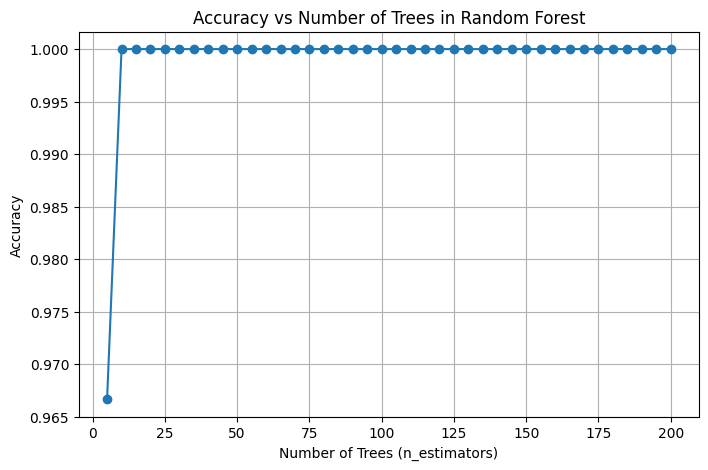

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df["species"] = iris.target
iris_df.head()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf_default = RandomForestClassifier(n_estimators=10, random_state=42)
clf_default.fit(X_train, y_train)
y_pred_default = clf_default.predict(X_test)
default_score = accuracy_score(y_test, y_pred_default)
print("Default n_estimators=10, Accuracy:", default_score)
best_score = 0
best_n = 0
scores = []
for n in range(5, 201, 5):
    clf = RandomForestClassifier(n_estimators=n, random_state=42)
    clf.fit(X_train, y_train)
    score = accuracy_score(y_test, clf.predict(X_test))
    scores.append((n, score))
    if score > best_score:
        best_score = score
        best_n = n

results_df = pd.DataFrame(scores, columns=["n_estimators", "accuracy_score"])

print("Best Accuracy:", best_score, "with n_estimators =", best_n)
results_df.head(10)
plt.figure(figsize=(8,5))
plt.plot(results_df["n_estimators"], results_df["accuracy_score"], marker='o')
plt.title("Accuracy vs Number of Trees in Random Forest")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()